# Coregistration

<h3> Learning objectives </h3> 

After completing this module, you should be able to:

1. Explain what coregistration does
2. Perform coregistration on your dataset
3. Identify any issues that may have ocurred in the coregistration process

<h3> Overview </h3>

Another important preprocessing step is coregistration. Coregistration is done for each participant. During the coregistration process, "blurrier" functional images are aligned with "sharper" anatomical images. This allows for more precise spatial normalization.

In the previous module, we inspected an anatomical image. Now, we will turn our focus to functional images. With functional scanes, we are interested in changes in brain activity happening over time. This is why head movement is problematic. We want to make sure any changes over time are due to changes in brain activity -- not simply changes in the position of the participant's head. 

Let's get started by loading and inspecting a functional image.

In [13]:
from nilearn import datasets

In [14]:
haxby_dataset = datasets.fetch_haxby() # takes about 278M disk space

In [15]:
haxby_dataset.func

['/Users/Emma/nilearn_data/haxby2001/subj2/bold.nii.gz']

Again, the file name provides information about the type of data stored in it and the file format. We can tell from the file name above that it contains a functional image ("func"), that it is a NIfTI file (because of the ".nii" extension) and that it is compressed using gzip (the ".gz" extension.)

Next we need to read the file into a variable in our Python environment. Nilearn provides tools for reading and writing NIfTI files in nilearn.image. Now we will use nilearn.image.load_img() to read the dataset we downloaded into a variable in our Python environment.

In [16]:
from nilearn import image

haxby_func = image.load_img(haxby_dataset.func)

Now the variable haxby_func is an object that contains the brain image data stored in the NIfTI file we downloaded, as well as lots of information about that brain image, or metadata, such as the dimensions of the image, the bit depth of the data, and so on.
Now we will inspect the brain image data (setting the metadata aside for later).

In [17]:
haxby_func_data = haxby_func.get_data()

Do you remeber how to get information about the properties of this data file? Let's check out the shape.

In [18]:
haxby_func_data.shape

(40, 64, 64, 1452)

Remember that by convention, the first three dimensions are x, y, and z, and the fourth dimension is time.

When we inspected the anatomical image, the time dimension was '1'. Notice that here the time dimension is much longer and that the resolution of the x,y,z dimensions is lower.

In [19]:
type(haxby_func_data)

numpy.ndarray

# Plotting Functional Images

Let's install our handy plotting tools.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
from nilearn import plotting

Before plotting the functional images, we need to convert this 4-dimensional image file to a 3-dimensional one. Luckily, nilearn has a function for this! This function tells nilern to hold the time dimension constant. 

In [22]:
image.index_img(haxby_func, 0)

In [23]:
zooms = haxby_func.header.get_zooms()
print(zooms)

(3.5, 3.75, 3.75, 1.0)


Once again, we see that we have non-isotropic voxels. We can check the voxel size by inspecting the metadata. The first three values correspond to the voxel sizes in the x, y, and z dimensions. Like before, we can use these values to calculate the proper aspect ratio for displaying the image.

# Insert cool little movie here

Below is a plot that takes all 

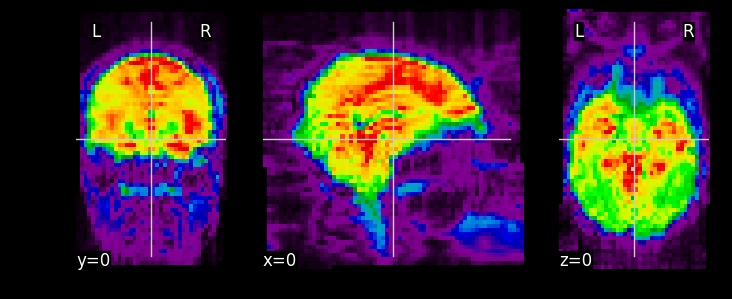

In [24]:
plotting.plot_epi(image.index_img(haxby_func, 0), cut_coords=(0, 0, 0));

Whoa! What's going on here?? That doesn't look like a brain. 

And in fact... it shouldn't! 

Functional images are quick snapshots of the brain. We definitely need to do some work to make any sense of these images. Let's abandon plotting for now. 